In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Sales.csv", encoding='latin-1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30.0,95.70,2.0,2871.0,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,897 Long Airport Avenue,NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
1,10121,34.0,81.35,5.0,2765.9,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,59 rue de l'Abbaye,NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
2,10107,-30.0,95.70,2.0,2871.0,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,897 Long Airport Avenue,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10121,-34.0,81.35,5.0,2765.9,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,59 rue de l'Abbaye,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,C10107,30.0,95.70,2.0,2871.0,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,897 Long Airport Avenue,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars
0,10107,30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,Rance,Martine,Small,False,True,False,False,False,False,False
1,10121,34.0,81.35,5.0,2765.90,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,Oeztan,Veysel,Medium,False,True,False,False,False,False,False
2,10107,-30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,Da Cunha,Daniel,Medium,False,True,False,False,False,False,False
3,10121,-34.0,81.35,5.0,2765.90,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,Young,Julie,Medium,False,True,False,False,False,False,False
5,C10121,34.0,81.35,5.0,2765.90,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,Hirano,Juri,Medium,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10283,33.0,51.32,12.0,1693.56,8/20/2004 0:00,Shipped,3.0,8.0,2004.0,...,Freyre,Diego,Small,False,False,False,True,False,False,False
2819,10293,32.0,60.06,1.0,1921.92,9/9/2004 0:00,Shipped,3.0,9.0,2004.0,...,Koskitalo,Pirkko,Medium,False,False,False,True,False,False,False
2820,10306,35.0,59.51,6.0,2082.85,10/14/2004 0:00,Shipped,4.0,10.0,2004.0,...,Freyre,Diego,Medium,False,False,False,True,False,False,False
2821,10315,40.0,55.69,5.0,2227.60,10/29/2004 0:00,Shipped,4.0,10.0,2004.0,...,Roulet,Annette,Small,False,False,False,True,False,False,False


In [43]:
df.describe()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,CustomerID
count,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000
mean,34.587706,83.061466,6.505622,3373.749082,2.722639,7.118816,2003.795727,98.739130,41.567466
std,9.552658,20.334313,4.241532,1569.936559,1.211858,3.681923,0.689976,38.485923,25.344798
min,-34.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.000000,33.000000,1.000000
25%,27.000000,67.925000,3.000000,2170.777500,2.000000,4.000000,2003.000000,68.000000,22.000000
50%,34.000000,93.770000,6.000000,3115.660000,3.000000,8.000000,2004.000000,96.000000,40.000000
75%,42.000000,100.000000,9.000000,4327.250000,4.000000,11.000000,2004.000000,122.000000,63.000000
max,85.000000,100.000000,18.000000,7901.100000,4.000000,12.000000,2005.000000,214.000000,92.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2668 entries, 0 to 2822
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ORDERNUMBER                   2668 non-null   object 
 1   QUANTITYORDERED               2668 non-null   float64
 2   PRICEEACH                     2668 non-null   float64
 3   ORDERLINENUMBER               2668 non-null   float64
 4   SALES                         2668 non-null   float64
 5   ORDERDATE                     2668 non-null   object 
 6   STATUS                        2668 non-null   object 
 7   QTR_ID                        2668 non-null   float64
 8   MONTH_ID                      2668 non-null   float64
 9   YEAR_ID                       2668 non-null   float64
 10  MSRP                          2668 non-null   float64
 11  PRODUCTCODE                   2668 non-null   object 
 12  CUSTOMERNAME                  2668 non-null   object 
 13  Customer

In [ ]:
df

In [38]:
unique_counts_per_column = {}
for column in df.columns:
    unique_count = df[column].nunique()
    unique_counts_per_column[column] = unique_count

# Display the total count of unique values in each column
print("Total count of unique values in each column:")
for column, count in unique_counts_per_column.items():
    print(f"{column}: {count}")

Total count of unique values in each column:
ORDERNUMBER: 307
QUANTITYORDERED: 54
PRICEEACH: 1000
ORDERLINENUMBER: 18
SALES: 2607
ORDERDATE: 251
STATUS: 6
QTR_ID: 4
MONTH_ID: 12
YEAR_ID: 3
MSRP: 80
PRODUCTCODE: 109
CUSTOMERNAME: 92
CustomerID: 92
PHONE: 91
ADDRESSLINE1: 92
CITY: 71
POSTALCODE: 73
COUNTRY: 19
CONTACTLASTNAME: 76
CONTACTFIRSTNAME: 72
DEALSIZE: 3
PRODUCTLINE_Classic Cars: 2
PRODUCTLINE_Motorcycles: 2
PRODUCTLINE_Planes: 2
PRODUCTLINE_Ships: 2
PRODUCTLINE_Trains: 2
PRODUCTLINE_Trucks and Buses: 2
PRODUCTLINE_Vintage Cars: 2


## **Data Preprocessing**




<Axes: xlabel='SALES'>

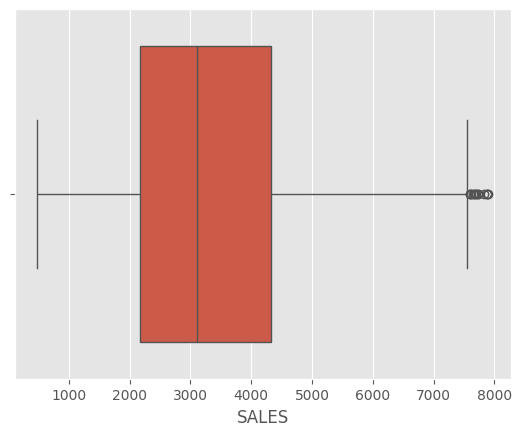

In [39]:
sns.boxplot(data=df,x='SALES')

In [40]:
amount_column = df['SALES']

# Calculate the five-number summary
minimum_value = amount_column.min()
first_quartile = amount_column.quantile(0.25)
median_value = amount_column.median()
third_quartile = amount_column.quantile(0.75)
maximum_value = amount_column.max()

# Display the five-number summary
print(f"Minimum: {minimum_value}")
print(f"First Quartile (Q1): {first_quartile}")
print(f"Median (Q2): {median_value}")
print(f"Third Quartile (Q3): {third_quartile}")
print(f"Maximum: {maximum_value}")

Minimum: 482.13
First Quartile (Q1): 2170.7775
Median (Q2): 3115.66
Third Quartile (Q3): 4327.25
Maximum: 7901.1


In [41]:
null_values = df.isnull()

# Use sum() to count the number of True values (True is equivalent to 1, and False is equivalent to 0)
null_counts = null_values.sum()

# Display the number of null values in each column
print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
ORDERNUMBER                     0
QUANTITYORDERED                 0
PRICEEACH                       0
ORDERLINENUMBER                 0
SALES                           0
ORDERDATE                       0
STATUS                          0
QTR_ID                          0
MONTH_ID                        0
YEAR_ID                         0
MSRP                            0
PRODUCTCODE                     0
CUSTOMERNAME                    0
CustomerID                      0
PHONE                           0
ADDRESSLINE1                    0
CITY                            0
POSTALCODE                      0
COUNTRY                         0
CONTACTLASTNAME                 0
CONTACTFIRSTNAME                0
DEALSIZE                        0
PRODUCTLINE_Classic Cars        0
PRODUCTLINE_Motorcycles         0
PRODUCTLINE_Planes              0
PRODUCTLINE_Ships               0
PRODUCTLINE_Trains              0
PRODUCTLINE_Trucks and Buses    0
PRODUCTLIN

In [42]:
#removing the column with most empty cells
columns_to_drop = ['STATE','TERRITORY']

# Use the drop() method with inplace=True to remove the specified columns in place
df.drop(columns=columns_to_drop, inplace=True)

KeyError: "['STATE', 'TERRITORY'] not found in axis"

In [ ]:
columns_to_drop = ['ADDRESSLINE2']

# Use the drop() method with inplace=True to remove the specified columns in place
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
null_values = df.isnull()

# Use sum() to count the number of True values (True is equivalent to 1, and False is equivalent to 0)
null_counts = null_values.sum()

# Display the number of null values in each column
print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
ORDERNUMBER          6
QUANTITYORDERED      6
PRICEEACH            6
ORDERLINENUMBER      6
SALES                6
ORDERDATE            6
STATUS               6
QTR_ID               6
MONTH_ID             6
YEAR_ID              6
PRODUCTLINE          6
MSRP                 6
PRODUCTCODE          6
CUSTOMERNAME         6
CustomerID           6
PHONE                6
ADDRESSLINE1         6
CITY                 6
POSTALCODE          82
COUNTRY              6
CONTACTLASTNAME      6
CONTACTFIRSTNAME     6
DEALSIZE             6
dtype: int64


In [ ]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CUSTOMERNAME,CustomerID,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30.0,95.70,2.0,2871.0,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,Land of Toys Inc.,1.0,2125557818,897 Long Airport Avenue,Lille,59000,France,Rance,Martine,Small
1,10121,34.0,81.35,5.0,2765.9,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,Reims Collectables,2.0,26.47.1555,59 rue de l'Abbaye,Bergen,N 5804,Norway,Oeztan,Veysel,Medium
2,10107,-30.0,95.70,2.0,2871.0,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,Land of Toys Inc.,1.0,2125557818,897 Long Airport Avenue,Paris,75508,France,Da Cunha,Daniel,Medium
3,10121,-34.0,81.35,5.0,2765.9,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,Reims Collectables,2.0,26.47.1555,59 rue de l'Abbaye,Pasadena,90003,USA,Young,Julie,Medium
4,C10107,30.0,95.70,2.0,2871.0,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,Land of Toys Inc.,1.0,2125557818,897 Long Airport Avenue,San Francisco,NaN,USA,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CUSTOMERNAME,CustomerID,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,Land of Toys Inc.,1.0,2125557818,897 Long Airport Avenue,Lille,59000,France,Rance,Martine,Small
1,10121,34.0,81.35,5.0,2765.90,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,Reims Collectables,2.0,26.47.1555,59 rue de l'Abbaye,Bergen,N 5804,Norway,Oeztan,Veysel,Medium
2,10107,-30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,Land of Toys Inc.,1.0,2125557818,897 Long Airport Avenue,Paris,75508,France,Da Cunha,Daniel,Medium
3,10121,-34.0,81.35,5.0,2765.90,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,Reims Collectables,2.0,26.47.1555,59 rue de l'Abbaye,Pasadena,90003,USA,Young,Julie,Medium
5,C10121,34.0,81.35,5.0,2765.90,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,Reims Collectables,2.0,26.47.1555,59 rue de l'Abbaye,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10283,33.0,51.32,12.0,1693.56,8/20/2004 0:00,Shipped,3.0,8.0,2004.0,...,"Royal Canadian Collectables, Ltd.",58.0,(604) 555-4555,23 Tsawassen Blvd.,Madrid,28034,Spain,Freyre,Diego,Small
2819,10293,32.0,60.06,1.0,1921.92,9/9/2004 0:00,Shipped,3.0,9.0,2004.0,...,Amica Models & Co.,37.0,011-4988555,Via Monte Bianco 34,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2820,10306,35.0,59.51,6.0,2082.85,10/14/2004 0:00,Shipped,4.0,10.0,2004.0,...,"AV Stores, Co.",78.0,(171) 555-1555,Fauntleroy Circus,Madrid,28034,Spain,Freyre,Diego,Medium
2821,10315,40.0,55.69,5.0,2227.60,10/29/2004 0:00,Shipped,4.0,10.0,2004.0,...,La Rochelle Gifts,15.0,40.67.8555,"67, rue des Cinquante Otages",Toulouse,31000,France,Roulet,Annette,Small


In [ ]:
# Handling outliers using IQR method
Q1 = df['SALES'].quantile(0.25)
Q3 = df['SALES'].quantile(0.75)
IQR = Q3 - Q1

# Keeping data points within 1.5 times the IQR
df = df[~((df['SALES'] < (Q1 - 1.5 * IQR)) | (df['SALES'] > (Q3 + 1.5 * IQR)))]


In [ ]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CUSTOMERNAME,CustomerID,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,Land of Toys Inc.,1.0,2125557818,897 Long Airport Avenue,Lille,59000,France,Rance,Martine,Small
1,10121,34.0,81.35,5.0,2765.90,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,Reims Collectables,2.0,26.47.1555,59 rue de l'Abbaye,Bergen,N 5804,Norway,Oeztan,Veysel,Medium
2,10107,-30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,Land of Toys Inc.,1.0,2125557818,897 Long Airport Avenue,Paris,75508,France,Da Cunha,Daniel,Medium
3,10121,-34.0,81.35,5.0,2765.90,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,Reims Collectables,2.0,26.47.1555,59 rue de l'Abbaye,Pasadena,90003,USA,Young,Julie,Medium
5,C10121,34.0,81.35,5.0,2765.90,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,Reims Collectables,2.0,26.47.1555,59 rue de l'Abbaye,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10283,33.0,51.32,12.0,1693.56,8/20/2004 0:00,Shipped,3.0,8.0,2004.0,...,"Royal Canadian Collectables, Ltd.",58.0,(604) 555-4555,23 Tsawassen Blvd.,Madrid,28034,Spain,Freyre,Diego,Small
2819,10293,32.0,60.06,1.0,1921.92,9/9/2004 0:00,Shipped,3.0,9.0,2004.0,...,Amica Models & Co.,37.0,011-4988555,Via Monte Bianco 34,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2820,10306,35.0,59.51,6.0,2082.85,10/14/2004 0:00,Shipped,4.0,10.0,2004.0,...,"AV Stores, Co.",78.0,(171) 555-1555,Fauntleroy Circus,Madrid,28034,Spain,Freyre,Diego,Medium
2821,10315,40.0,55.69,5.0,2227.60,10/29/2004 0:00,Shipped,4.0,10.0,2004.0,...,La Rochelle Gifts,15.0,40.67.8555,"67, rue des Cinquante Otages",Toulouse,31000,France,Roulet,Annette,Small


<Axes: xlabel='SALES'>

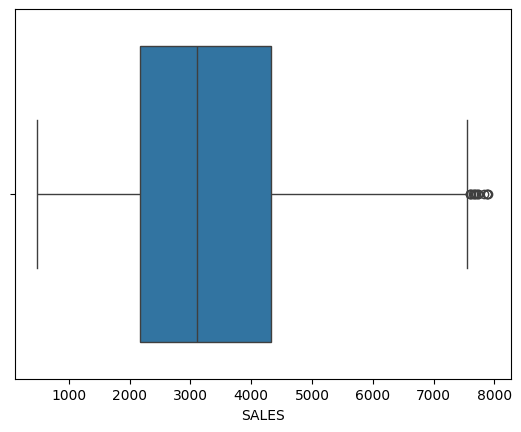

In [ ]:
sns.boxplot(data=df,x='SALES')

In [ ]:
# Transformations/format
# Apply necessary transformations like encoding categorical variables, scaling, etc.
# Example: Encoding categorical variables
#Encodes categorical variables using one-hot encoding. In this case, it creates binary columns for each category in the 'PRODUCTLINE' column.
df = pd.get_dummies(df, columns=['PRODUCTLINE'])

In [ ]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars
0,10107,30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,Rance,Martine,Small,False,True,False,False,False,False,False
1,10121,34.0,81.35,5.0,2765.90,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,Oeztan,Veysel,Medium,False,True,False,False,False,False,False
2,10107,-30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,Da Cunha,Daniel,Medium,False,True,False,False,False,False,False
3,10121,-34.0,81.35,5.0,2765.90,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,Young,Julie,Medium,False,True,False,False,False,False,False
5,C10121,34.0,81.35,5.0,2765.90,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,Hirano,Juri,Medium,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10283,33.0,51.32,12.0,1693.56,8/20/2004 0:00,Shipped,3.0,8.0,2004.0,...,Freyre,Diego,Small,False,False,False,True,False,False,False
2819,10293,32.0,60.06,1.0,1921.92,9/9/2004 0:00,Shipped,3.0,9.0,2004.0,...,Koskitalo,Pirkko,Medium,False,False,False,True,False,False,False
2820,10306,35.0,59.51,6.0,2082.85,10/14/2004 0:00,Shipped,4.0,10.0,2004.0,...,Freyre,Diego,Medium,False,False,False,True,False,False,False
2821,10315,40.0,55.69,5.0,2227.60,10/29/2004 0:00,Shipped,4.0,10.0,2004.0,...,Roulet,Annette,Small,False,False,False,True,False,False,False


# **Frequency Distributions, Averages, and Variability**

QUANTITYORDERED
Mean:  34.587706146926536
Median:  34.0
Mode:  34.0
Standard Deviation:  9.552657856669597


PRICEEACH
Mean:  83.06146551724137
Median:  93.77
Mode:  100.0
Standard Deviation:  20.33431265508601


ORDERLINENUMBER
Mean:  6.505622188905547
Median:  6.0
Mode:  1.0
Standard Deviation:  4.241532099474027


QTR_ID
Mean:  2.7226386806596703
Median:  3.0
Mode:  4.0
Standard Deviation:  1.211857524237349


YEAR_ID
Mean:  2003.7957271364319
Median:  2004.0
Mode:  2004.0
Standard Deviation:  0.6899762496674126


MSRP
Mean:  98.73913043478261
Median:  96.0
Mode:  118.0
Standard Deviation:  38.48592297529151




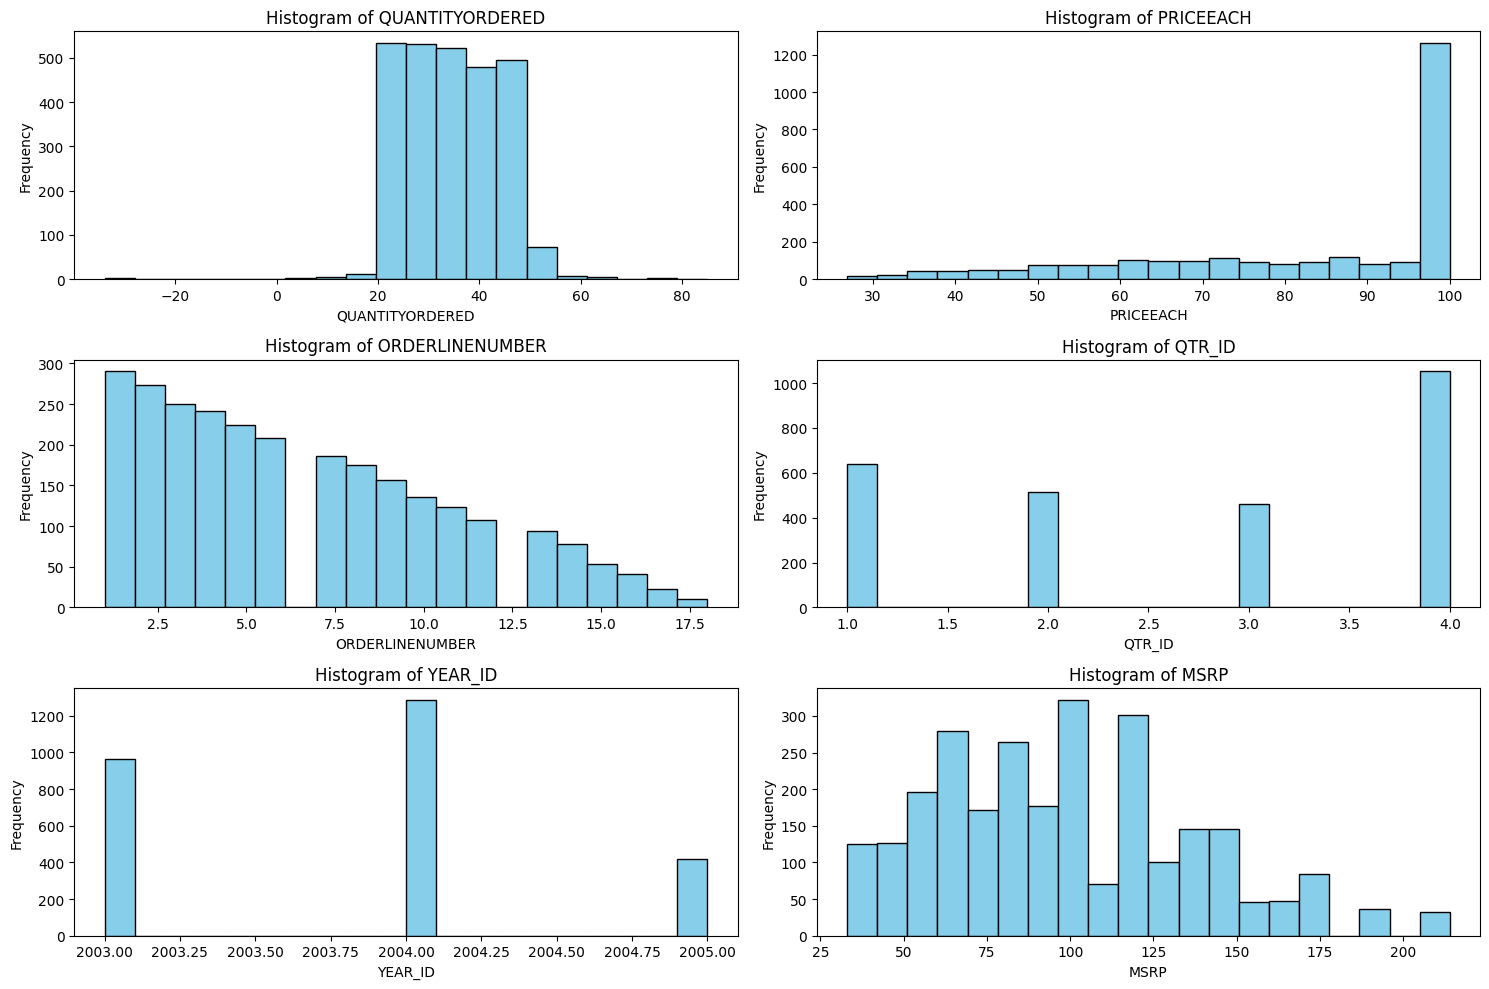

In [ ]:
# Load the preprocessed data
#df = pd.read_csv("preprocessed_data.csv")

# Averages
columns = ['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'QTR_ID', 'YEAR_ID', 'MSRP']
for col in columns:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()[0]
    std_dev_val = df[col].std()

    print(col)
    print("Mean: ", mean_val)
    print("Median: ", median_val)
    print("Mode: ", mode_val)
    print("Standard Deviation: ", std_dev_val)
    print("\n")

# Create subplots based on the number of columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))  # Adjusted the number of rows

# Flatten the axes for ease of iteration
axes = axes.flatten()

# Loop through each column and create frequency distribution
for i, column in enumerate(columns):
    # Choose appropriate plot type based on data type
    if df[column].dtype == 'O':  # 'O' represents object (categorical) type
        value_counts = df[column].value_counts()
        axes[i].bar(value_counts.index, value_counts.values, color='skyblue')
        axes[i].set_title(f'Frequency Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    else:
        axes[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()



# Normal Curves, Correlation, and Scatter **Plots**

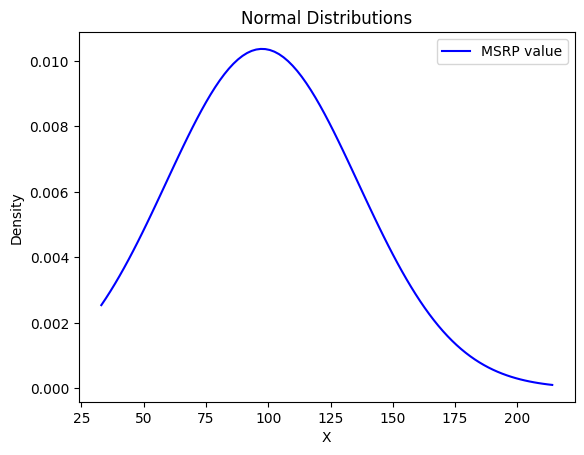

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

def normal_dist(X, mean, std, parameter):
    x = np.linspace(min(X), max(X), 100)  # Define x values for the plot
    plt.plot(x, norm.pdf(x, mean, std), label=parameter, color='blue')
    plt.ylabel('Density')
    plt.xlabel('X')
    plt.title('Normal Distributions')
    plt.legend()
    plt.show()

# Example usage:
# Replace 'your_data' with the actual data and provide mean, std, and parameter values
normal_dist(df['MSRP'].astype(float),97.53,38.49, 'MSRP value')


## Inferences
The normal distribution plot exhibits a slight tail on the right (positive skewness) and dips lower on the right (longer right tail).

The normal distribution plot of the data exhibits a slight rightward skewness, indicating a higher concentration of values on the left side with a longer right tail. This suggests a departure from perfect normality, potentially hinting at the presence of outliers or underlying patterns that deviate from the symmetrical bell-shaped curve.

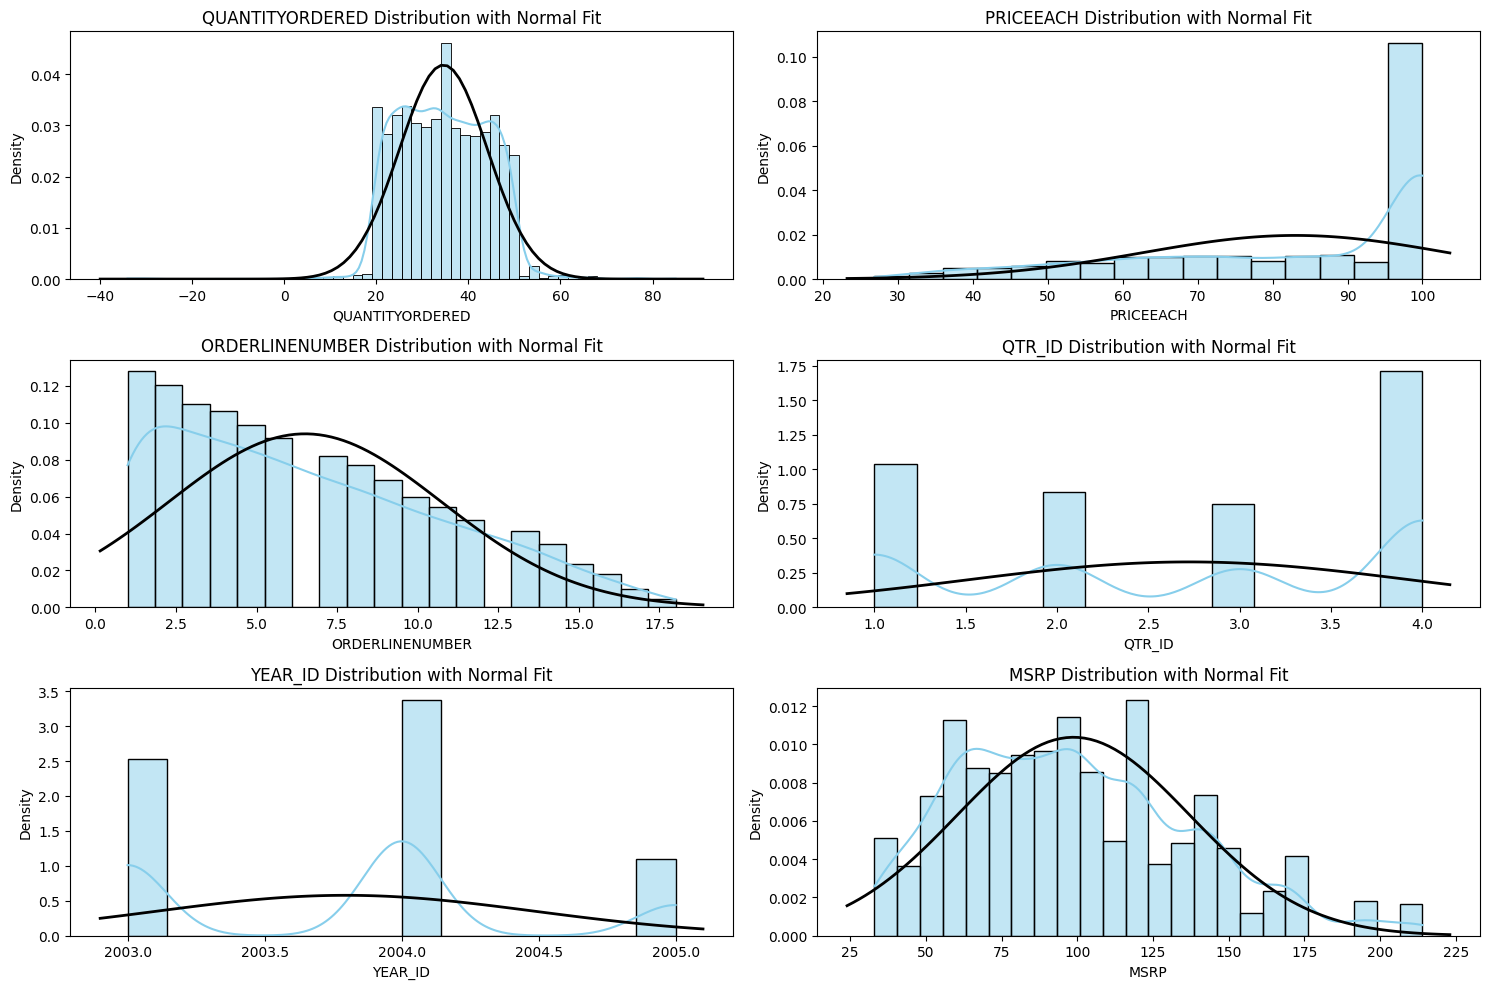

In [ ]:
num_fields = len(columns)
num_rows = int(np.ceil(num_fields / 2))
num_cols = 2  # Two plots per row

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()

for i, field in enumerate(columns):
    sns.histplot(df[field], kde=True, color='skyblue', stat='density', ax=axes[i])
    mu, std = norm.fit(df[field])

    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[i].plot(x, p, 'k', linewidth=2)

    axes[i].set_title(f'{field} Distribution with Normal Fit')
    axes[i].set_xlabel(field)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

# The plots include histograms of the data with overlaid normal distribution fits for each numerical field. 

C:\Users\Harsh\AppData\Local\Temp\ipykernel_10320\2443880457.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=ax1, palette='Set1')
C:\Users\Harsh\AppData\Local\Temp\ipykernel_10320\2443880457.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


<Figure size 640x480 with 0 Axes>

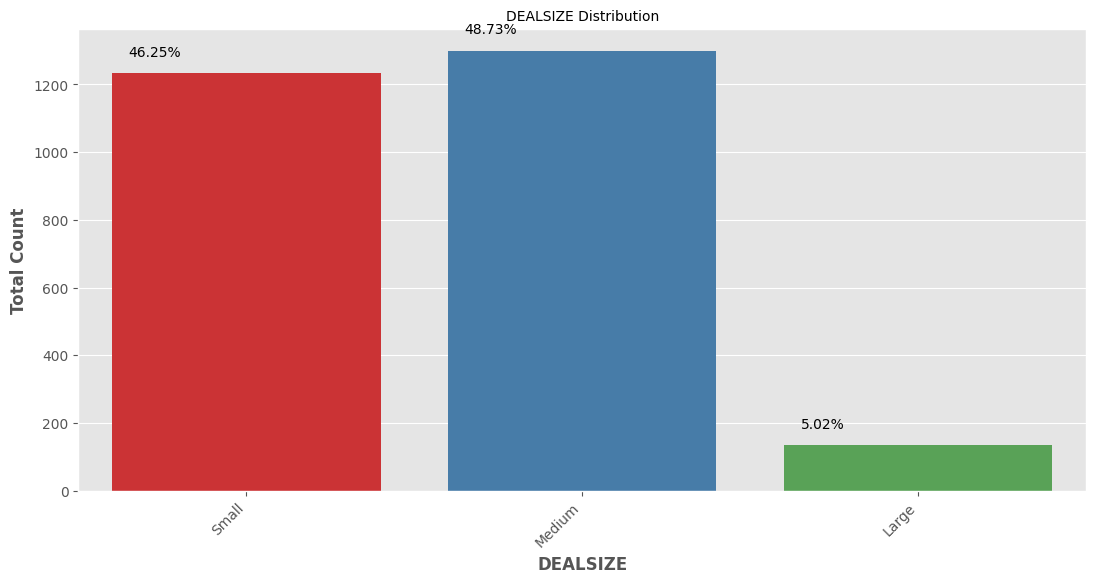

In [ ]:
def cat_plot(data, col):
    plt.style.use('ggplot')
    sns.despine()
    fig, ax1 = plt.subplots(figsize=(13, 6))

    # Count plot for the specified categorical column
    sns.countplot(x=col, data=data, ax=ax1, palette='Set1')
    ax1.set_ylabel('Total Count', fontweight="bold")
    ax1.set_xlabel(f'{col}', fontweight="bold")
    ax1.set_title(f'{col} Distribution', fontsize=10)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

    # Adding the normalized percentage for easier comparison
    total_count = len(data)
    for p in ax1.patches:
        ax1.annotate('{:.2f}%'.format((p.get_height() / total_count) * 100),
                     (p.get_x() + 0.05, p.get_height() + 50))

    plt.show()


cat_plot(df, 'DEALSIZE')
# cat_plot(your_data_frame, 'dealsize')


# INFERENCES
Small Deals-the most common dealsize.

Medium Deals-the dominant dealsize.

Large Deals-the least frequent dealsize

The majority of deals fall into the "small" and "medium" categories, while "large" deals are less common.


C:\Users\Harsh\AppData\Local\Temp\ipykernel_10320\2443880457.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=ax1, palette='Set1')
C:\Users\Harsh\AppData\Local\Temp\ipykernel_10320\2443880457.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


<Figure size 640x480 with 0 Axes>

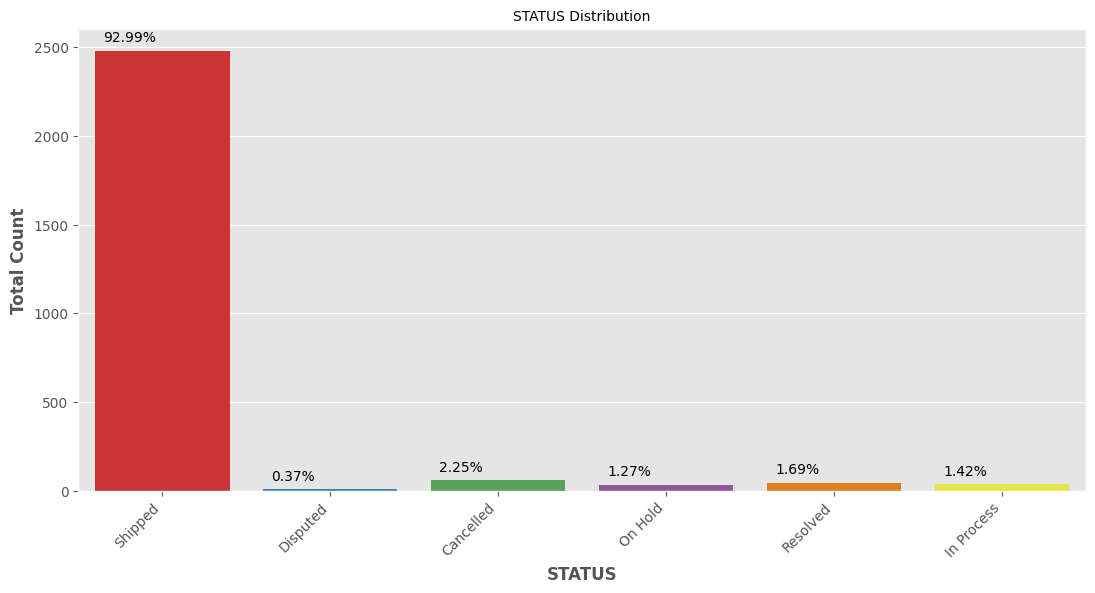

In [ ]:
cat_plot(df, 'STATUS')

# Inferences

Shipped- The dominant status category.

Disputed-  It is the least frequent . 
In Process- It is relatively uncommon compared to "shipped" but more frequent than "disputed."
Cancelled- It is a notable proportion

Resolved-It is a moderate proportion in your dataset.

On Hold-It is a moderate proportion.

C:\Users\Harsh\AppData\Local\Temp\ipykernel_10320\2443880457.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=ax1, palette='Set1')
C:\Users\Harsh\AppData\Local\Temp\ipykernel_10320\2443880457.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


<Figure size 640x480 with 0 Axes>

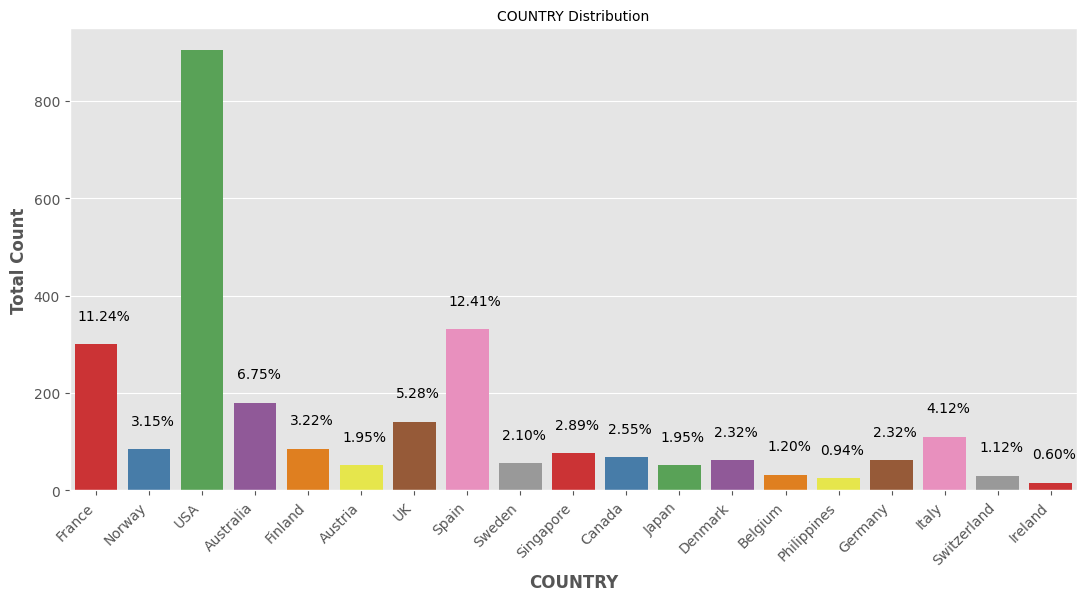

In [ ]:
cat_plot(df, 'COUNTRY')

# Inferences
USA-the highest,most prevalent country.

Spain-the second most common country.

France-the third most common country.

Ireland- the least prevalent country.

In [ ]:
#From the list columns like 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', and 'DEALSIZE' appear to be categorical, 
#And columns like 'QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', and others seem to be continuous.

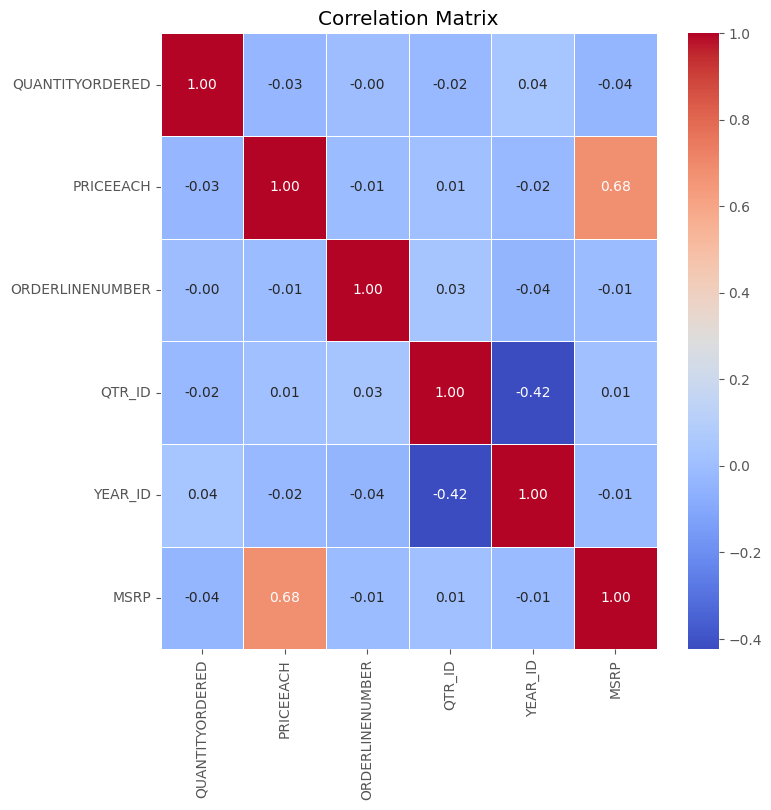

In [ ]:
correlation_matrix = df[columns].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Scatter plots

<function matplotlib.pyplot.show(close=None, block=None)>

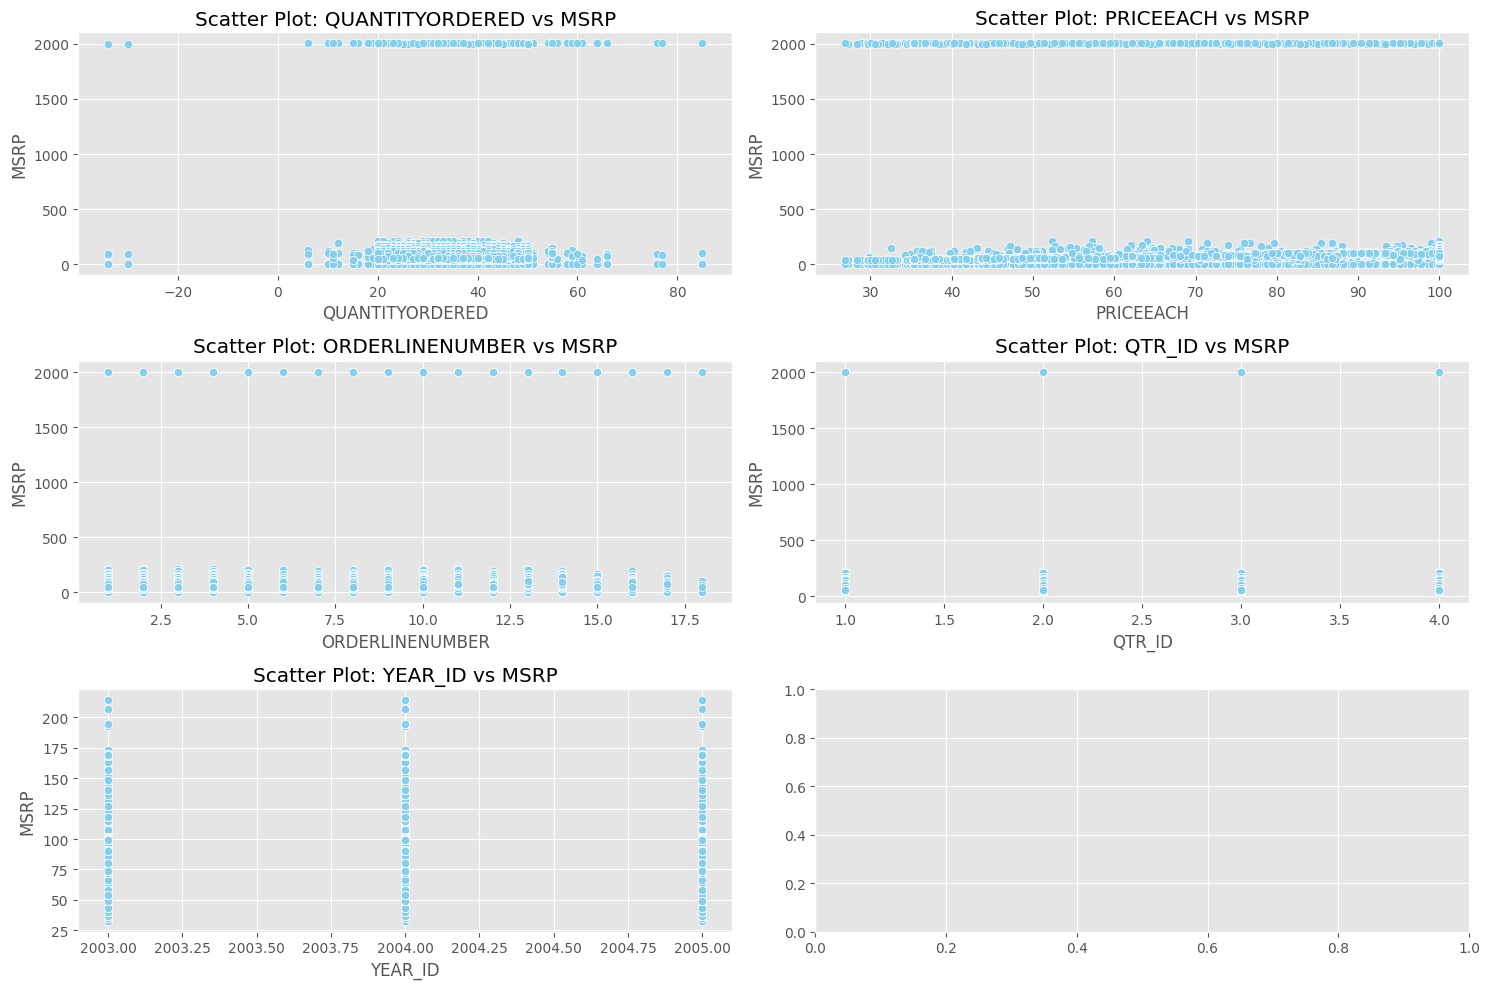

In [ ]:
num_fields = len(columns)
num_rows = int(np.ceil(num_fields / 2))
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Plot scatter plot
        sns.scatterplot(x=columns[i], y=columns[j], data=df, color='skyblue', ax=axes[i])
        axes[i].set_title(f'Scatter Plot: {columns[i]} vs {columns[j]}')
        axes[i].set_xlabel(columns[i])
        axes[i].set_ylabel(columns[j])

plt.tight_layout()
plt.show


## Inferences
A horizontal pattern may suggest a specific relationship between the variables on the x-axis and y-axis. It could imply that the y-values are dependent on the x-values in a particular way. Here, Msrp is the dependent value and PriceEach is the independent variable

# **Regression**

Mean Squared Error: 836.53
R-squared: 0.45
Coefficients: [1.29293077]
Intercept: -8.645572529553874


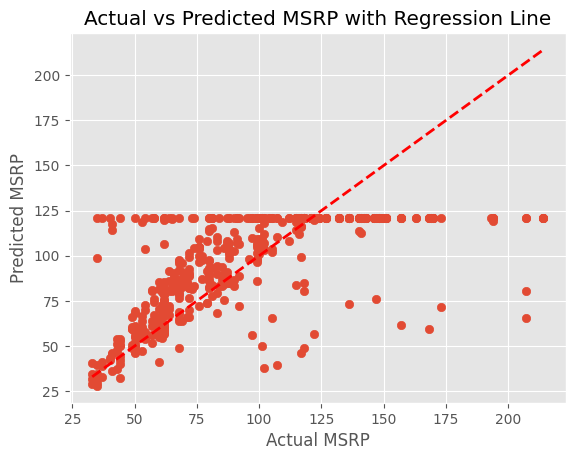

In [ ]:
independent_variables = ['PRICEEACH']
dependent_variable = 'MSRP'  # Change the dependent variable

# Select the features and the target variable
X = df[independent_variables]
y = df[dependent_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize the predictions against the actual values with regression line
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Regression line
plt.xlabel('Actual MSRP')
plt.ylabel('Predicted MSRP')
# Access the coefficients and intercept
coefficients = reg_model.coef_
intercept = reg_model.intercept_

# Print the coefficients and intercept
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')
plt.title('Actual vs Predicted MSRP with Regression Line')
plt.show()

## Inferences
The model has a moderate R² value, suggesting that the linear relationship between PRICEEACH and MSRP explains a significant portion of the variability in MSRP.

The positive coefficient for PRICEEACH indicates a positive linear relationship, suggesting that higher values of PRICEEACH are associated with higher values of MSRP.

The intercept provides the estimated MSRP when PRICEEACH is zero, but this might not be meaningful in a real-world context, especially if PRICEEACH cannot be zero.

# Z-**Test**

# **Z-Test for one sample**

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest

print("H0:There is no significant difference between sample mean and given mean.")
print("H1:There is significant difference between to variable. ")

group1=df['MSRP']
print("-----------------")
print("Describe of QuantityOrdered:")
print(group1.describe())
print('-----------------')
z_stat1,p_value1=ztest(group1,value=100)
print(p_value1)
z_alpha=0.05
if p_value1<z_alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Accept the null hypothesis: There is no significant difference between the sample mean and given mean.")

H0:There is no significant difference between sample mean and given mean.
H1:There is significant difference between to variable. 
-----------------
Describe of QuantityOrdered:
count    2668.000000
mean       98.739130
std        38.485923
min        33.000000
25%        68.000000
50%        96.000000
75%       122.000000
max       214.000000
Name: MSRP, dtype: float64
-----------------
0.09060080804243446
Accept the null hypothesis: There is no significant difference between the sample mean and given mean.


# **Z-Test for two samples**

In [ ]:
print("H0:There is no significant difference between means.")
print("H1:There is significant difference between to variable. ")

group1=df['PRICEEACH']
group2=df['MSRP']

z_stat,p_value=ztest(group1,group2)

z_alpha=0.05

if p_value<z_alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Accept the null hypothesis: There is no significant difference between the means.")

H0:There is no significant difference between means.
H1:There is significant difference between to variable. 
Reject the null hypothesis: There is a significant difference between the means.


# **T-test**

T-test for one sample

In [ ]:
from scipy import stats

group1=df['PRICEEACH']
print("-----------------")
#print("Describe of QuantityOrdered:")
print(group1.describe())

t_stat,pt_value=stats.ttest_1samp(df['PRICEEACH'],80)

t_alpha=0.05
if pt_value<t_alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Accept the null hypothesis: There is no significant difference between the means.")

-----------------
count    2668.000000
mean       83.061466
std        20.334313
min        26.880000
25%        67.925000
50%        93.770000
75%       100.000000
max       100.000000
Name: PRICEEACH, dtype: float64
Reject the null hypothesis: There is a significant difference between the means.


T-test for two samples

In [ ]:
t_stat,pt1_value=stats.ttest_ind(df['QUANTITYORDERED'],df['SALES'])
t_alpha=0.05
#print(pt1_value)
if pt_value<t_alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Accept the null hypothesis: There is no significant difference between the means.")

Reject the null hypothesis: There is a significant difference between the means.


# **ANOVA**

In [ ]:
#To decide which columns are suitable for an ANOVA test, we generally need a categorical variable (grouping variable) and a continuous variable. 
#From the list columns like 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', and 'DEALSIZE' appear to be categorical, 
#And columns like 'QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', and others seem to be continuous.
#The code below performs ANOVA tests for some of the continuous variables against a categorical variable (e.g., 'STATUS').

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Select columns for ANOVA test
continuous_columns = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']

# Choose a categorical variable for grouping
categorical_column = 'STATUS'

# Perform ANOVA for each continuous variable
for continuous_column in continuous_columns:
    grouped_data = [df[continuous_column][df[categorical_column] == group] for group in df[categorical_column].unique()]
    
    # Perform ANOVA
    f_statistic, p_value = f_oneway(*grouped_data)

    # Significance Level
    alpha = 0.05

    # Decision Based on p-value
    if p_value < alpha:
        print(f'Reject the null hypothesis. There is a significant difference for {continuous_column} (p-value: {p_value})')
    else:
        print(f'Accept the null hypothesis. There is no significant difference for {continuous_column} (p-value: {p_value})')


Reject the null hypothesis. There is a significant difference for QUANTITYORDERED (p-value: 0.010355368297422295)
Accept the null hypothesis. There is no significant difference for PRICEEACH (p-value: 0.2665391681483391)
Accept the null hypothesis. There is no significant difference for SALES (p-value: 0.11224033694032212)
Accept the null hypothesis. There is no significant difference for MSRP (p-value: 0.8200656701381555)


## Building and Validating Linear Models

Mean Squared Error: 1537940.15
R-squared: 0.37


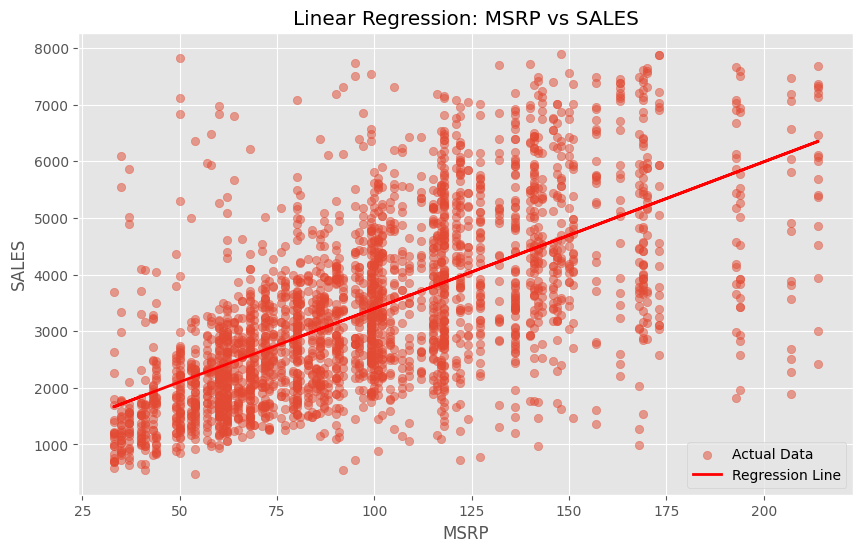

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame containing 'SALES' and 'MSRP' columns
# If not, replace df with your actual DataFrame

# Extract 'SALES' and 'MSRP' columns from the DataFrame
x = df['MSRP'].values.reshape(-1, 1)  # 'MSRP' on the x-axis
y = df['SALES'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Plot the scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: MSRP vs SALES')
plt.xlabel('MSRP')  # Swap x and y labels
plt.ylabel('SALES')  # Swap x and y labels
plt.legend()
plt.grid(True)
plt.show()


# Inferences

## Descriptive Statistics:
The dataset contains information about orders, quantities, prices, order numbers, quarters, years, and MSRP.
Variables like QUANTITYORDERED, PRICEEACH, and MSRP have moderate variability.

## Hypothesis Testing:
Based on the p-values, there is no significant difference between the sample means and given means for QUANTITYORDERED, PRICEEACH, SALES, and MSRP.

## Linear Regression Model:
The model has a moderate R² value, suggesting that the linear relationship between MSRP and SALES explains a portion of the variability in SALES.
The relatively high MSE indicates that the model's predictions have a substantial average squared error, suggesting that the model may not be accurately capturing the variability in the data.

## Overall Inferences:
The dataset appears to have relatively consistent measures for the provided variables.
The linear regression model for predicting QTR_ID based on SALES does not provide a strong relationship.